<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

En un laboratorio de diagnostico requiere automatizar su proceso de detección en pacientes con diabetes.

Nosotros fuimos contratados para buscar mejoras en la identificación de pacientes con diabetes. El análisis de los pacientes actualmente se realiza de forma manual, paciente por paciente, lo que consume mucho tiempo y, aun así, la detección de pacientes con diabetes es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la laboratorio de diagnostico para **clasificar** a los pacientes con diabetes y los que no tienen diabetes.

## <font color='dark'>Clasificando los datos</h1>

### Lectura y separación de los datos

Se realiza la carga, exploración y separación de los datos con la biblioteca pandas.

In [ ]:
#Cargando base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sciencie Python/Clasificación: validación de modelos y métricas de evaluación/diabetes.csv')

In [ ]:
#Explorando base de datos
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


Se dividen los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que se quiere clasificar ('diabetes'), que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes.

In [ ]:
#Separación de los datos
X = datos.drop(columns='diabetes', axis=1)
y = datos.diabetes

### Creando un modelo inicial

Se realiza un primer modelo inicial de árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_decition_tree = DecisionTreeClassifier()
modelo_decition_tree.fit(X, y)

DecisionTreeClassifier()

In [ ]:
modelo_decition_tree.score(X, y)

1.0

***Nota:*** El modelo obtiene una exactitud del **1.0** el valor más alto que se puede obtener pero el modelo de árbol de decisión no se encuentra parametrizado y el entranemiento del mismo se realizo con todo el conjuto de datos lo que puede indicarnos que tenemos un sobreajuste en nuestro modelo.

### Validando el modelo

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

Se realiza la división de los datos entre entrenamiento, validación y prueba. Se utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, se utiliza el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y, random_state=5)

Se prueba el modelo entrenandolo con el conjunto de datos entrenamiento y se valida con el conjunto de datos de validación. Además se agrega a nuestro modelo de árbol de clasificación una profundidad especifica para no permitir que el modelo se especialice demasiado y mejorar el rendimiento del mismo.



In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=3)
modelo_decition_tree.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_decition_tree.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_decition_tree.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.7571428571428571
La exactitud del modelo con el conjunto de validación es: 0.776595744680851


### Creación de un segundo modelo

Utilizando el conjunto de datos separado se realiza un modelo de bosque aleatorio.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
modelo_random_forest.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_random_forest.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_random_forest.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.7321428571428571
La exactitud del modelo con el conjunto de validación es: 0.6702127659574468


### Evaluando los modelos

La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase.

Se construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_previsto_decition_tree = modelo_decition_tree.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto_decition_tree)
print(matriz_confusion)

[[52 11]
 [10 21]]


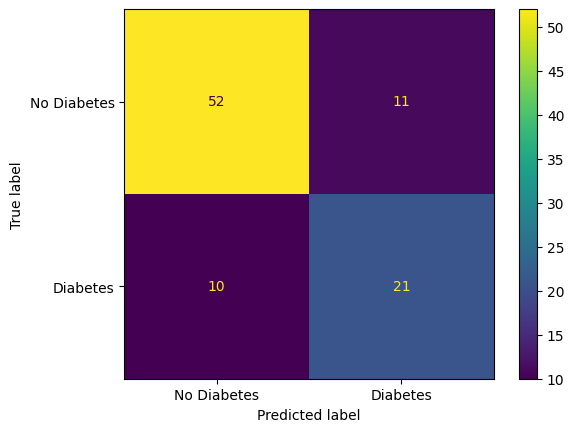

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No Diabetes','Diabetes'])
visualizacion.plot();

In [ ]:
y_previsto_random_forest = modelo_random_forest.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto_random_forest)
print(matriz_confusion)

[[57  6]
 [25  6]]


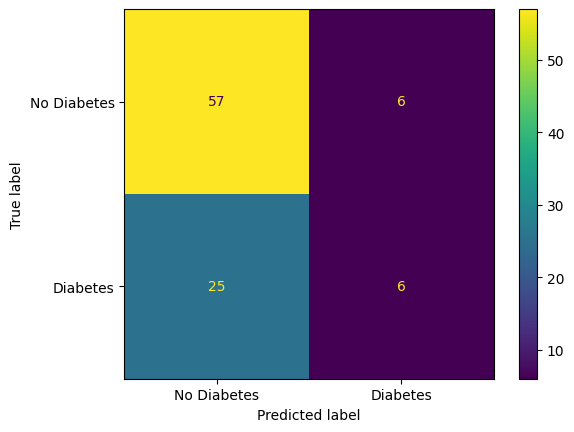

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No Diabetes','Diabetes'])
visualizacion.plot();

Con esta matriz de confusión podemos visualizar la cantidad de falsos y verdaderos negativos y falsos y verdaros positivos.

Por ejemplo: En este caso con el árbol de decisión se obtuvo 17 falsos negativos o sea que se está diagnosticando 17 personas como no diabeticas las cuales, acorde con los datos que se proporcionaron al principio del ánalisis, sí tiene en realidad diabetes diagnosticada mientras con el algoritmo del bosque aleatorio se detecta 22 falsos negativos.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión.

Las principales métricas de clasificación son:

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

* Precisión (Precision): Proporción de verdaderos positivos sobre todos los casos predichos como positivos. Mide qué tan confiables son las predicciones positivas.

* Sensibilidad (Recall o Tasa de Verdaderos Positivos): Proporción de verdaderos positivos sobre todos los casos realmente positivos.Mide qué tan bien se detectan los positivos reales.

* Exactitud (Accuracy): Proporción de predicciones correctas (positivas y negativas) sobre el total de predicciones. Evalúa el rendimiento general del modelo.

*  F1 Score: Media armónica entre precisión y recall. Equilibra ambos valores, útil cuando hay clases desbalanceadas.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Metricas obtenidas con el algoritmo de arbol de decisión



In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto_decition_tree)}')
print(f'La sensibiliad (Recall) del modelo es: {recall_score(y_val, y_previsto_decition_tree)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto_decition_tree)}')
print(f'El f1 score (f1_score) del modelo es: {f1_score(y_val, y_previsto_decition_tree)}')

La precisión del modelo es: 0.65625
La sensibiliad (Recall) del modelo es: 0.6774193548387096
La exactitud (accuracy) del modelo es: 0.776595744680851
El f1 score (f1_score) del modelo es: 0.6666666666666666


Metricas obtenidas con el algoritmo de bosque aleatorio

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto_random_forest)}')
print(f'La sensibiliad (Recall) del modelo es: {recall_score(y_val, y_previsto_random_forest)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto_random_forest)}')
print(f'El f1 score (f1_score) del modelo es: {f1_score(y_val, y_previsto_random_forest)}')

La precisión del modelo es: 0.5
La sensibiliad (Recall) del modelo es: 0.1935483870967742
La exactitud (accuracy) del modelo es: 0.6702127659574468
El f1 score (f1_score) del modelo es: 0.27906976744186046


### Curva ROC

La curva ROC (Receiver Operating Characteristic, o Característica Operativa del Receptor) es una representación gráfica que evalúa el rendimiento de un modelo de clasificación. Muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) para diferentes umbrales de decisión. Se utiliza para comparar la efectividad de diferentes modelos o para ajustar el umbral de decisión en un modelo específico, especialmente cuando se busca un equilibrio entre sensibilidad y especificidad.

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [ ]:
from sklearn.metrics import RocCurveDisplay

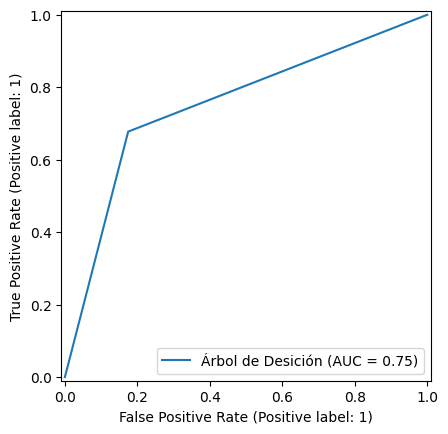

In [ ]:
RocCurveDisplay.from_predictions(y_val, y_previsto_decition_tree, name='Árbol de Desición');

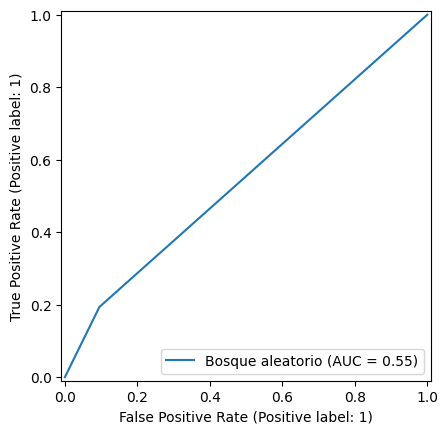

In [ ]:
RocCurveDisplay.from_predictions(y_val, y_previsto_random_forest, name='Bosque aleatorio');

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto_decition_tree)}')
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto_random_forest)}')

El área bajo la curva ROC es: 0.7514080901177674
El área bajo la curva ROC es: 0.5491551459293394


¿Cómo interpretarla?

Una curva más cerca de la esquina superior izquierda indica un mejor rendimiento del modelo.

El área bajo la curva (AUC) es una métrica importante: valores cercanos a 1 indican un buen modelo, mientras que 0.5 indica un modelo aleatorio.

### Curva de  precisión x sensibilidad

La curva de precisión vs. sensibilidad (Precision-Recall Curve) es una herramienta utilizada para evaluar el rendimiento de modelos de clasificación, especialmente en contextos con clases desbalanceadas. Representa gráficamente la relación entre la precisión (proporción de verdaderos positivos sobre los positivos predichos) y la sensibilidad o recall (proporción de verdaderos positivos sobre los casos realmente positivos), variando el umbral de decisión del modelo. Esta curva permite visualizar cómo el modelo equilibra la capacidad de identificar correctamente los positivos reales sin perder precisión. Un modelo ideal mantiene alta precisión incluso con alto recall, lo que se refleja en una curva más cercana a la esquina superior derecha.





In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

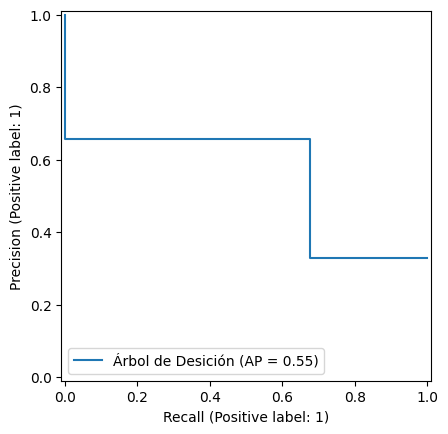

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_decition_tree, name='Árbol de Desición');

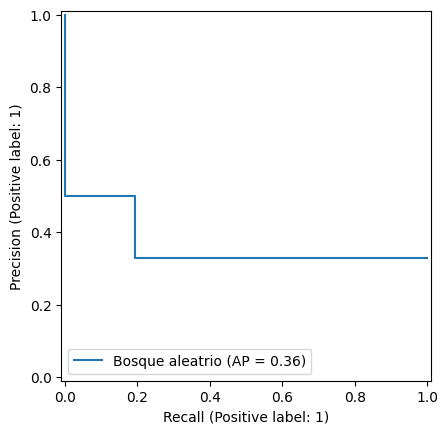

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_random_forest, name='Bosque aleatrio');

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto_decition_tree)}')
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto_random_forest)}')

El score promedio de precision vs recall es: 0.5509394303363074
El score promedio de precision vs recall es: 0.36273164035689764


¿Cómo interpretarla?

Una curva más alta y a la derecha indica mejor desempeño.

Si la precisión cae rápidamente al aumentar el recall, el modelo tiene dificultad para mantener predicciones positivas confiables.

El área bajo la curva (AP) es una métrica importante: valores cercanos a 1 indican un buen modelo, mientras que 0.5 indica un modelo aleatorio.

### Informe de métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('-'*60)
print('-                 Modelo de árbol de decisión              -')
print('-'*60)
print(classification_report(y_val, y_previsto_decition_tree))
print('-'*60)
print('-                 Modelo de bosque aleatorio               -')
print('-'*60)
print(classification_report(y_val, y_previsto_random_forest))

------------------------------------------------------------
-                 Modelo de árbol de decisión              -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

------------------------------------------------------------
-                 Modelo de bosque aleatorio               -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        63
           1       0.50      0.19      0.28        31

    accuracy                           0.67        94
   macro avg       0.60      0.55      0.53        94
weighted avg       0.63      0.67  

El este caso el algoritmo de bosque aleatorio muestra una sensibilidad y F1 score con valores más bajos siendo el modelo más deficiente hasta el momento ya que estás metricas nos sirven de base para hacer ajustes en nuestros modelos y comprobar después de los ajustes que han mejorado.

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, se evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [ ]:
from sklearn.model_selection import KFold,cross_validate

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=3)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados_decition_tree = cross_validate(modelo_decition_tree, X, y, cv=kf, scoring=['precision', 'recall', 'accuracy', 'f1'])
cv_resultados_decition_tree

{'fit_time': array([0.00438666, 0.00450969, 0.00388598, 0.00402975, 0.00574589,
        0.0039134 , 0.00489688, 0.00420213, 0.00387597, 0.00396991]),
 'score_time': array([0.01691628, 0.01342082, 0.01280022, 0.01496077, 0.01534915,
        0.01934099, 0.01439953, 0.01254201, 0.01943421, 0.01240015]),
 'test_precision': array([0.23809524, 0.42857143, 0.5625    , 0.44444444, 0.875     ,
        0.5       , 0.55555556, 0.6       , 0.875     , 0.71428571]),
 'test_recall': array([0.625     , 0.25      , 0.69230769, 0.4       , 0.5       ,
        0.46153846, 0.55555556, 0.4       , 0.5       , 0.66666667]),
 'test_accuracy': array([0.5       , 0.65789474, 0.71052632, 0.71052632, 0.78378378,
        0.64864865, 0.78378378, 0.64864865, 0.78378378, 0.75675676]),
 'test_f1': array([0.34482759, 0.31578947, 0.62068966, 0.42105263, 0.63636364,
        0.48      , 0.55555556, 0.48      , 0.63636364, 0.68965517])}

In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados_random_forest = cross_validate(modelo_random_forest, X, y, cv=kf, scoring=['precision', 'recall', 'accuracy', 'f1'])
cv_resultados_random_forest

{'fit_time': array([0.27358031, 0.25185323, 0.27281737, 0.27729321, 0.80149841,
        0.2771256 , 0.77091503, 0.28956938, 0.16674161, 0.43975997]),
 'score_time': array([0.02715397, 0.03016067, 0.02794647, 0.03968239, 0.12992358,
        0.02993059, 0.03104067, 0.01992607, 0.02225661, 0.07656407]),
 'test_precision': array([0.28571429, 0.5       , 0.66666667, 0.44444444, 1.        ,
        0.33333333, 0.45454545, 0.5       , 0.75      , 1.        ]),
 'test_recall': array([0.25      , 0.25      , 0.30769231, 0.4       , 0.14285714,
        0.07692308, 0.55555556, 0.06666667, 0.21428571, 0.26666667]),
 'test_accuracy': array([0.71052632, 0.68421053, 0.71052632, 0.71052632, 0.67567568,
        0.62162162, 0.72972973, 0.59459459, 0.67567568, 0.7027027 ]),
 'test_f1': array([0.26666667, 0.33333333, 0.42105263, 0.42105263, 0.25      ,
        0.125     , 0.5       , 0.11764706, 0.33333333, 0.42105263])}

Calculo de intervalo de confianza

En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Se crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar (95%) .

In [ ]:
def intervalo_confianza (resultados):
  for metrica in resultados:
    if(metrica != 'fit_time' and metrica != 'score_time'):
      promedio = resultados[metrica].mean()
      desvio_std = resultados[metrica].std()
      intervalo_inferior = max(promedio-2*desvio_std,0)
      intervalo_superior = min(promedio+2*desvio_std,1)
      print(f'El intervalo de confianza en {metrica} es: [{intervalo_inferior},{intervalo_superior}]')

In [ ]:
intervalo_confianza(cv_resultados_decition_tree)

El intervalo de confianza en test_precision es: [0.20093438524139723,0.957756090949079]
El intervalo de confianza en test_recall es: [0.24650294120233524,0.76371073401134]
El intervalo de confianza en test_accuracy es: [0.5292910838089362,0.8675794709563556]
El intervalo de confianza en test_f1 es: [0.2709624974648346,0.7650969720029834]


In [ ]:
intervalo_confianza(cv_resultados_random_forest)

El intervalo de confianza en test_precision es: [0.11107669252958136,1]
El intervalo de confianza en test_recall es: [0,0.5328491211131376]
El intervalo de confianza en test_accuracy es: [0.6002983413759866,0.7628595533608555]
El intervalo de confianza en test_f1 es: [0.07388744793113522,0.5639402094476058]


### Estratificando los datos

En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, se utiliza el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Se valúa el desempeño de los modelos con el mismo intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando las métricas usando el parámetro scoring.

In [ ]:
datos.diabetes.value_counts()

,count
diabetes,
0,264
1,130


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=3)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_decition_tree = cross_validate(modelo_decition_tree, X, y, cv=skf, scoring=['precision', 'recall', 'f1', 'accuracy'])
cv_resultados_decition_tree

{'fit_time': array([0.00554895, 0.00293708, 0.0034914 , 0.00296903, 0.0038116 ]),
 'score_time': array([0.01277971, 0.01280522, 0.01161695, 0.01063728, 0.01030159]),
 'test_precision': array([0.42105263, 0.48484848, 0.58333333, 0.6       , 0.65      ]),
 'test_recall': array([0.32      , 0.64      , 0.28      , 0.25      , 0.54166667]),
 'test_f1': array([0.36363636, 0.55172414, 0.37837838, 0.35294118, 0.59090909]),
 'test_accuracy': array([0.62666667, 0.65333333, 0.69333333, 0.70666667, 0.75675676])}

In [ ]:
intervalo_confianza(cv_resultados_decition_tree)

El intervalo de confianza en test_precision es: [0.38181056755016013,0.7138832123541461]
El intervalo de confianza en test_recall es: [0.09550361932402068,0.717163047342646]
El intervalo de confianza en test_f1 es: [0.2432021602071678,0.6518334987230144]
El intervalo de confianza en test_accuracy es: [0.5976147041271307,0.7770879985755721]


In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_random_forest = cross_validate(modelo_random_forest, X, y, cv=skf, scoring=['precision', 'recall', 'f1', 'accuracy'])
cv_resultados_random_forest

{'fit_time': array([0.16557145, 0.1702528 , 0.16667914, 0.15865827, 0.17168093]),
 'score_time': array([0.01698875, 0.02647233, 0.01708508, 0.01745224, 0.02206039]),
 'test_precision': array([0.5       , 0.53333333, 0.66666667, 0.5       , 0.64285714]),
 'test_recall': array([0.24      , 0.32      , 0.16      , 0.16666667, 0.375     ]),
 'test_f1': array([0.32432432, 0.4       , 0.25806452, 0.25      , 0.47368421]),
 'test_accuracy': array([0.66666667, 0.68      , 0.69333333, 0.68      , 0.72972973])}

In [ ]:
intervalo_confianza(cv_resultados_random_forest)

El intervalo de confianza en test_precision es: [0.42494177126469435,0.7122010858781627]
El intervalo de confianza en test_recall es: [0.08347310184652712,0.4211935648201396]
El intervalo de confianza en test_f1 es: [0.17028013835490982,0.5121490820369591]
El intervalo de confianza en test_accuracy es: [0.6467349068864731,0.733156985005419]


**Método LeaveOneOut**

En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, solo se extrae la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

In [ ]:
from sklearn.model_selection import LeaveOneOut
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
def promedio (resultados):
  for metrica in resultados:
    if(metrica != 'fit_time' and metrica != 'score_time'):
      promedio = resultados[metrica].mean()
      print(f'El promedio en {metrica} es: {promedio}')

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=3)
kf_one = LeaveOneOut()
cv_resultados_decition_tree = cross_validate(modelo_decition_tree, X, y, cv=kf_one, scoring=['precision', 'recall', 'f1', 'accuracy'])

In [ ]:
promedio(cv_resultados_decition_tree)

El promedio en test_precision es: 0.12032085561497326
El promedio en test_recall es: 0.12032085561497326
El promedio en test_f1 es: 0.12032085561497326
El promedio en test_accuracy es: 0.7085561497326203


In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
kf_one = LeaveOneOut()
cv_resultados_random_forest = cross_validate(modelo_random_forest, X, y, cv=kf_one, scoring=['precision', 'recall', 'f1', 'accuracy'])

In [ ]:
promedio(cv_resultados_random_forest)

El promedio en test_precision es: 0.08021390374331551
El promedio en test_recall es: 0.08021390374331551
El promedio en test_f1 es: 0.08021390374331551
El promedio en test_accuracy es: 0.6818181818181818


## <font color='dark'>Balanceo de los datos</h1>

El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, Se verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis se realiza a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) y la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

In [ ]:
datos.diabetes.value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


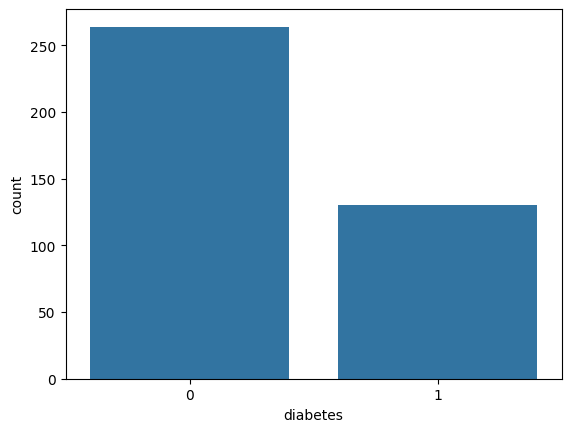

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diabetes', data=datos)
plt.show()

### Pipeline para validación y Oversampling

Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Se utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('oversample', SMOTE()), ('arbol de decisión', modelo_decition_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1', 'recall', 'precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.4179653044491009,0.5821123166369702]
El intervalo de confianza en test_recall es: [0.4127585268845691,0.7719081397820975]
El intervalo de confianza en test_precision es: [0.35443889938357764,0.5225749619248867]


In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
pipeline = imbpipeline(steps=[('oversample', SMOTE()), ('bosque aleatorio', modelo_random_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1', 'recall', 'precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.5768337108987557,0.6729147038539732]
El intervalo de confianza en test_recall es: [0.5877173701582494,0.9229492965084174]
El intervalo de confianza en test_precision es: [0.47619772920593306,0.6001885538876671]


### Undersampling

Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Se utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version=3)), ('arbol de decisión', modelo_decition_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1','recall','precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.3749686756138757,0.5472134825877375]
El intervalo de confianza en test_recall es: [0.38750545494051947,0.7184945450594806]
El intervalo de confianza en test_precision es: [0.3331177481248876,0.46561894033956863]


In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version=3)), ('bosque aleatorio', modelo_random_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1','recall','precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.44060552639915473,0.7519299212954057]
El intervalo de confianza en test_recall es: [0.39839156749159127,0.9802750991750755]
El intervalo de confianza en test_precision es: [0.4355914704603022,0.6358274269569913]


### Undersampling y Oversampling combinado


 Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
modelo_decition_tree = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('SMOTEENN', SMOTEENN()), ('arbol de decisión', modelo_decition_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1','recall','precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.5395714446763741,0.6860168197700528]
El intervalo de confianza en test_recall es: [0.5932465971382196,0.8687534028617806]
El intervalo de confianza en test_precision es: [0.4255011916465731,0.6401556228033448]


In [ ]:
modelo_random_forest = RandomForestClassifier(max_depth=2)
pipeline = imbpipeline(steps=[('SMOTEENN', SMOTEENN()), ('arbol de decisión', modelo_random_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring=['f1','recall','precision'])
intervalo_confianza(cv_resultados)

El intervalo de confianza en test_f1 es: [0.5273252963113422,0.6964266757418469]
El intervalo de confianza en test_recall es: [0.5689878052180932,1]
El intervalo de confianza en test_precision es: [0.4260015086741161,0.585246817467827]


### Probando el modelo

Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación.

El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora.

In [ ]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.55      0.86      0.67         7

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20



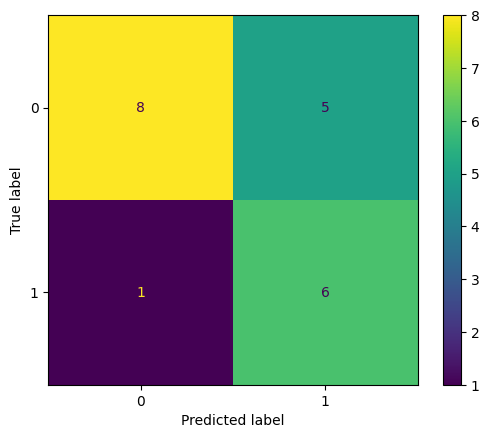

In [ ]:
modelo = RandomForestClassifier(max_depth=2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

###**Conclusión**

Con base en los resultados del modelo de machine learning, se puede concluir lo siguiente:

El modelo alcanza una exactitud general del 70%, lo que indica un desempeño moderado sobre el conjunto de prueba.

La clase 0 (Pacientes diagnosticados sin diabetes) muestra una mayor precisión (0.89), lo que sugiere que el modelo identifica correctamente la mayoría de los pacientes no diabeticos contra los diabeticos. Sin embargo, su recall es bajo (0.62), lo que implica que no está detectando todos los casos reales de pacientes no diabeticos. Esto se refleja en un F1-score de 0.73, que indica un rendimiento razonable, pero con margen de mejora en la capacidad de recuperación de la clase.

Por otro lado, la clase 1 (Pacientes deiagnosticados con diabetes) presenta un comportamiento inverso: tiene una precisión más baja (0.55), lo que significa que muchos de sus prediciones de pacientes diabeticos pueden ser pacientes no diabeticos. Sin embargo, su recall es alto (0.86), lo que indica que detecta correctamente la mayoría de los pacientes diabeticos. Su F1-score es de 0.67, lo cual evidencia un balance algo más débil entre precisión y recuperación para esta clase.

En general, el modelo tiende a ser más conservador con la clase 0 y más permisivo con la clase 1. La media ponderada del F1-score es de 0.71, lo que refleja un rendimiento aceptable, aunque desigual entre clases. Esto sugiere que podrían explorarse mejoras, como el ajuste de umbrales de decisión, técnicas de balanceo de clases o el uso de algoritmos alternativos, para lograr una clasificación más equilibrada.

Con este modelo se puede asegurar un 70% de certeza de el 86% de los pacientes con Diabetes fueron detectados de forma correcta mientras que el 45% de los  pacientes diagnosticados con Diabetes pueden ser pacientes que no tienen la enfermedad por lo que se recomienda que se realiza una prueba confirmatoria.